# Tokenizing

In [1]:
import json

with open('1_scrapping_black_clover.json', 'r') as openfile:
    eps_summary = json.load(openfile)

In [2]:
eps_summary[0]

"In Hage, a priest finds two babies abandoned outside his church. He takes them inside and discovers their names to be Yuno and Asta.\nFifteen years later, Asta proposes to Sister Lily, who refuses repeatedly. Yuno and the other orphans criticize Asta and point out his lack of magic. Asta tries to show off his skills, but Yuno outshines him with his magic.\nLater, at the Grimoire Acceptance Ceremony, a pair of nobles criticize the commoners there. Despite Asta not receiving a grimoire while Yuno attains a four-leaf clover one, Asta challenges Yuno to the title of Wizard King, but Yuno ignores him.\nAfter the ceremony, the two nobles ambush Yuno outside the tower, but Yuno overpowers them. All three are then ambushed by Revchi Salik, a former Magic Knight who plans to steal Yuno's grimoire and sell it. Asta comes to Yuno's rescue but fails.\nAs Revchi breaks Asta's spirit, Yuno calls Asta his rival. Motivated by this acknowledgment, Asta decides to keep fighting, which summons a grimoir

## Tokenizing with Regular Expressions

In [3]:
import re

In [4]:
def tokenize_regrex(text):
    tokens = re.split(r"[ \n,.\"]+", text)
    tokens.remove('')
    return tokens

In [5]:
def tokenize_regrex_corpus(corpus):
    tokens = []
    for doc in corpus:
        tokens.extend(tokenize_regrex(doc))
    return tokens

In [6]:
regrex_tokens = tokenize_regrex(eps_summary[0])
print(regrex_tokens)

['In', 'Hage', 'a', 'priest', 'finds', 'two', 'babies', 'abandoned', 'outside', 'his', 'church', 'He', 'takes', 'them', 'inside', 'and', 'discovers', 'their', 'names', 'to', 'be', 'Yuno', 'and', 'Asta', 'Fifteen', 'years', 'later', 'Asta', 'proposes', 'to', 'Sister', 'Lily', 'who', 'refuses', 'repeatedly', 'Yuno', 'and', 'the', 'other', 'orphans', 'criticize', 'Asta', 'and', 'point', 'out', 'his', 'lack', 'of', 'magic', 'Asta', 'tries', 'to', 'show', 'off', 'his', 'skills', 'but', 'Yuno', 'outshines', 'him', 'with', 'his', 'magic', 'Later', 'at', 'the', 'Grimoire', 'Acceptance', 'Ceremony', 'a', 'pair', 'of', 'nobles', 'criticize', 'the', 'commoners', 'there', 'Despite', 'Asta', 'not', 'receiving', 'a', 'grimoire', 'while', 'Yuno', 'attains', 'a', 'four-leaf', 'clover', 'one', 'Asta', 'challenges', 'Yuno', 'to', 'the', 'title', 'of', 'Wizard', 'King', 'but', 'Yuno', 'ignores', 'him', 'After', 'the', 'ceremony', 'the', 'two', 'nobles', 'ambush', 'Yuno', 'outside', 'the', 'tower', 'but',

In [7]:
regrex_tokens = tokenize_regrex_corpus(eps_summary)

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
def generate_wordcloud_color(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis', width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [10]:
def generate_wordcloud_color_no_ranks(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis', relative_scaling=1, min_font_size=50, max_font_size=50, width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [11]:
def generate_wordcloud_monocolor(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, color_func=(lambda word, **kwargs: "white"), collocations=False, colormap='viridis', width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [12]:
def graph_wordcloud(wordcloud):
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [13]:
import pandas as pd

regrex_tokens_as_series = pd.Series(regrex_tokens)

In [14]:
def pandas_tokenize_drop_many(tokenized, to_drop):
    for dropping in to_drop:
        tokenized = tokenized.drop(tokenized[tokenized == dropping].index)
    return tokenized

### Most Mentioned Words

In [15]:
regrex_tokens_as_series.value_counts().head(10)

the     4254
to      3220
and     3195
that    2146
he      1294
is      1289
Asta    1281
of      1210
a       1184
him      956
dtype: int64

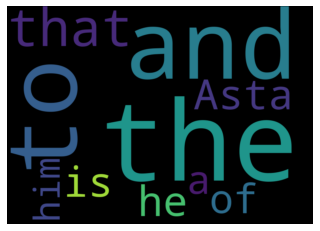

In [16]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series.value_counts().head(10)))

In [17]:
to_drop = ["the", "to", "and", "that", "he", "is", "of", "a", "him"]
regrex_tokens_as_series = pandas_tokenize_drop_many(regrex_tokens_as_series, to_drop)

In [18]:
regrex_tokens_as_series.value_counts().head(10)

Asta    1281
his      942
her      838
they     789
but      736
them     695
with     650
in       650
she      595
for      549
dtype: int64

In [19]:
to_drop = ["his", "her", "they", "but", "them", "in", "she", "with"]
regrex_tokens_as_series = pandas_tokenize_drop_many(regrex_tokens_as_series, to_drop)

In [20]:
regrex_tokens_as_series.value_counts().head(10)

Asta     1281
for       549
it        540
not       513
Magic     503
tells     477
as        472
are       465
Yami      455
magic     403
dtype: int64

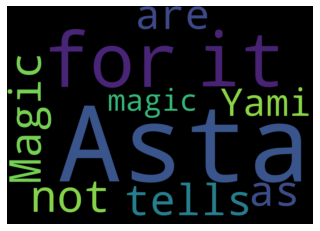

In [21]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series.value_counts().head(10)))

In [22]:
print(regrex_tokens_as_series[regrex_tokens_as_series == "Magic"].value_counts())
print()
print(regrex_tokens_as_series[regrex_tokens_as_series == "magic"].value_counts())

Magic    503
dtype: int64

magic    403
dtype: int64


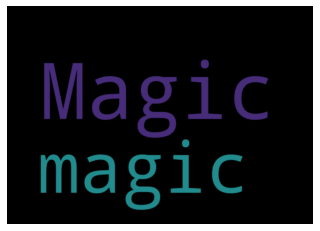

In [23]:
graph_wordcloud(generate_wordcloud_color(None, pd.concat([regrex_tokens_as_series[regrex_tokens_as_series == "Magic"], regrex_tokens_as_series[regrex_tokens_as_series == "magic"]]).value_counts()))

### Most Mentioned Characters

In [24]:
to_drop = ["it", "for", "not", "tells", "as", "are", "on", "their", "The", "was", "be", "about", "will", "by", "from", "at", "has"
            , "up", "out", "He", "asks", "have", "who", "says", "if", "how", "so", "can", "all", "back", "into", "Magic", "magic"
            , "attack", "Black", "Knights", "which", "because", "one", "what", "then", "Kingdom", "other", "She", "go", "get", "while"
            , "had", "this", "going", "does"]
regrex_tokens_as_series = pandas_tokenize_drop_many(regrex_tokens_as_series, to_drop)

In [25]:
regrex_tokens_as_series.value_counts().head(11)

Asta       1281
Yami        455
Noelle      390
Yuno        379
Julius      245
Finral      204
Licht       194
Vanessa     171
Magna       159
Gauche      145
through     138
dtype: int64

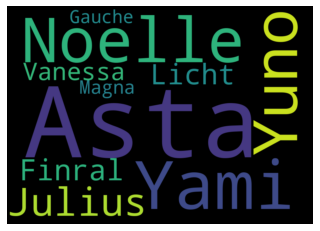

In [26]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series.value_counts().head(10)))

In [27]:
regrex_tokens_lower = list(map(lambda x : x.lower(), regrex_tokens))

In [28]:
regrex_tokens_as_series_lowered = pd.Series(regrex_tokens_lower)

In [29]:
regrex_tokens_as_series_lowered.value_counts().head(10)

the     4593
to      3228
and     3195
that    2160
he      1565
is      1289
asta    1281
a       1215
of      1210
him      956
dtype: int64

### Diversity / Pronoun Analysis

In [30]:
print(regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "he"].value_counts())
print()

print(regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "she"].value_counts())
print()

he    1565
dtype: int64

she    748
dtype: int64



In [31]:
subject_pronouns = pd.concat([regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "he"], regrex_tokens_as_series_lowered[regrex_tokens_as_series_lowered == "she"]])

In [32]:
print((regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "him") | (regrex_tokens_as_series_lowered == "his") | (regrex_tokens_as_series_lowered == "himself")].value_counts()))
print()

print(regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "her") | (regrex_tokens_as_series_lowered == "herself")].value_counts())
print()

print(regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "they") | (regrex_tokens_as_series_lowered == "them") | (regrex_tokens_as_series_lowered == "their") 
        | (regrex_tokens_as_series_lowered == "theirs") | (regrex_tokens_as_series_lowered == "themselves")].value_counts())
print()

him        956
his        948
himself     96
dtype: int64

her        841
herself     33
dtype: int64

they          899
them          695
their         386
themselves     25
theirs          1
dtype: int64



In [33]:
other_pronouns = regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "him") | (regrex_tokens_as_series_lowered == "his") | (regrex_tokens_as_series_lowered == "himself")]
other_pronouns = pd.concat([other_pronouns, regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "her") | (regrex_tokens_as_series_lowered == "herself")]])
other_pronouns = pd.concat([other_pronouns, regrex_tokens_as_series_lowered[(regrex_tokens_as_series_lowered == "they") | (regrex_tokens_as_series_lowered == "them") | (regrex_tokens_as_series_lowered == "their") 
        | (regrex_tokens_as_series_lowered == "theirs") | (regrex_tokens_as_series_lowered == "themselves")]])
other_pronouns.value_counts()

him           956
his           948
they          899
her           841
them          695
their         386
himself        96
herself        33
themselves     25
theirs          1
dtype: int64

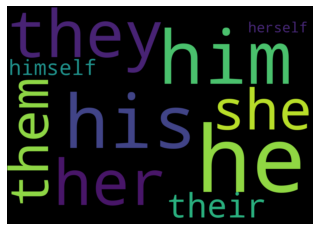

In [34]:
graph_wordcloud(generate_wordcloud_color(None, pd.concat([subject_pronouns, other_pronouns]).value_counts().head(10)))

### Most Frequent Non-Character Words

In [35]:
regrex_tokens_as_series_lowered.value_counts().head(10)

the     4593
to      3228
and     3195
that    2160
he      1565
is      1289
asta    1281
a       1215
of      1210
him      956
dtype: int64

In [36]:
to_drop = ["the", "to", "and", "that", "he", "is", "asta", "a", "of", "him", "his", "they", "her", "but", "she", "in", "them", "with"
            , "it", "as", "for", "not", "tells", "are", "yami", "noelle", "on", "yuno", "their", "was", "be", "at", "about", "will", "by"
            , "from", "has", "up", "out", "asks", "julius", "have", "who", "says", "if", "how", "so", "finral", "can", "back", "licht"
            , "black", "all", "while", "which", "because", "after", "into", "this", "when", "vanessa", "magna", "then", "what", "other"
            , "go", "get", "had", "going", "gauche", "does", "fanzell", "through", "uses", "there", "do", "an", "being", "vetto"
            , "tries", "would", "down", "more", "silva", "no", "gets", "cannot", "even", "charlotte", "fuegoleon", "also", "off", "before"
            , "were", "take", "been", "vermillion", "luck"]
regrex_tokens_as_series_lowered = pandas_tokenize_drop_many(regrex_tokens_as_series_lowered, to_drop)
regrex_tokens_as_series_lowered.value_counts().head(10)

magic      906
kingdom    196
knights    187
attack     178
one        174
mana       125
sword      121
time       121
bulls      117
help       116
dtype: int64

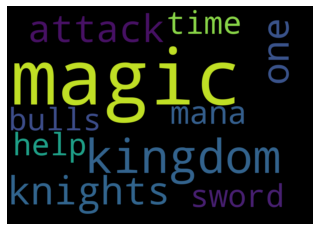

In [37]:
graph_wordcloud(generate_wordcloud_color(None, regrex_tokens_as_series_lowered.value_counts().head(10)))

## Tokenizing with NLTK

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pauli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from nltk import word_tokenize
from nltk import sent_tokenize

In [40]:
sent = sent_tokenize(eps_summary[0])
sent

['In Hage, a priest finds two babies abandoned outside his church.',
 'He takes them inside and discovers their names to be Yuno and Asta.',
 'Fifteen years later, Asta proposes to Sister Lily, who refuses repeatedly.',
 'Yuno and the other orphans criticize Asta and point out his lack of magic.',
 'Asta tries to show off his skills, but Yuno outshines him with his magic.',
 'Later, at the Grimoire Acceptance Ceremony, a pair of nobles criticize the commoners there.',
 'Despite Asta not receiving a grimoire while Yuno attains a four-leaf clover one, Asta challenges Yuno to the title of Wizard King, but Yuno ignores him.',
 'After the ceremony, the two nobles ambush Yuno outside the tower, but Yuno overpowers them.',
 "All three are then ambushed by Revchi Salik, a former Magic Knight who plans to steal Yuno's grimoire and sell it.",
 "Asta comes to Yuno's rescue but fails.",
 "As Revchi breaks Asta's spirit, Yuno calls Asta his rival.",
 'Motivated by this acknowledgment, Asta decides 

In [41]:
for p in sent:
    print(word_tokenize(p))

['In', 'Hage', ',', 'a', 'priest', 'finds', 'two', 'babies', 'abandoned', 'outside', 'his', 'church', '.']
['He', 'takes', 'them', 'inside', 'and', 'discovers', 'their', 'names', 'to', 'be', 'Yuno', 'and', 'Asta', '.']
['Fifteen', 'years', 'later', ',', 'Asta', 'proposes', 'to', 'Sister', 'Lily', ',', 'who', 'refuses', 'repeatedly', '.']
['Yuno', 'and', 'the', 'other', 'orphans', 'criticize', 'Asta', 'and', 'point', 'out', 'his', 'lack', 'of', 'magic', '.']
['Asta', 'tries', 'to', 'show', 'off', 'his', 'skills', ',', 'but', 'Yuno', 'outshines', 'him', 'with', 'his', 'magic', '.']
['Later', ',', 'at', 'the', 'Grimoire', 'Acceptance', 'Ceremony', ',', 'a', 'pair', 'of', 'nobles', 'criticize', 'the', 'commoners', 'there', '.']
['Despite', 'Asta', 'not', 'receiving', 'a', 'grimoire', 'while', 'Yuno', 'attains', 'a', 'four-leaf', 'clover', 'one', ',', 'Asta', 'challenges', 'Yuno', 'to', 'the', 'title', 'of', 'Wizard', 'King', ',', 'but', 'Yuno', 'ignores', 'him', '.']
['After', 'the', 'cere

In [42]:
def tokenize_nltk(text):
    ps = sent_tokenize(text)
    tokens = []
    for p in ps:
        tokens.extend(word_tokenize(p))
    return tokens

In [43]:
def tokenize_nltk_corpus(corpus):
    tokens = []
    for doc in corpus:
        tokens.extend(tokenize_nltk(doc))
    return tokens

In [44]:
nltk_tokens = tokenize_nltk_corpus(eps_summary)
nltk_tokens

['In',
 'Hage',
 ',',
 'a',
 'priest',
 'finds',
 'two',
 'babies',
 'abandoned',
 'outside',
 'his',
 'church',
 '.',
 'He',
 'takes',
 'them',
 'inside',
 'and',
 'discovers',
 'their',
 'names',
 'to',
 'be',
 'Yuno',
 'and',
 'Asta',
 '.',
 'Fifteen',
 'years',
 'later',
 ',',
 'Asta',
 'proposes',
 'to',
 'Sister',
 'Lily',
 ',',
 'who',
 'refuses',
 'repeatedly',
 '.',
 'Yuno',
 'and',
 'the',
 'other',
 'orphans',
 'criticize',
 'Asta',
 'and',
 'point',
 'out',
 'his',
 'lack',
 'of',
 'magic',
 '.',
 'Asta',
 'tries',
 'to',
 'show',
 'off',
 'his',
 'skills',
 ',',
 'but',
 'Yuno',
 'outshines',
 'him',
 'with',
 'his',
 'magic',
 '.',
 'Later',
 ',',
 'at',
 'the',
 'Grimoire',
 'Acceptance',
 'Ceremony',
 ',',
 'a',
 'pair',
 'of',
 'nobles',
 'criticize',
 'the',
 'commoners',
 'there',
 '.',
 'Despite',
 'Asta',
 'not',
 'receiving',
 'a',
 'grimoire',
 'while',
 'Yuno',
 'attains',
 'a',
 'four-leaf',
 'clover',
 'one',
 ',',
 'Asta',
 'challenges',
 'Yuno',
 'to',
 'the

In [45]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/pauli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
words_lowered       = [token.lower() for token in nltk_tokens if token.isalpha() and token.lower() not in stoplist]
words_not_lowered   = [token for token in nltk_tokens if token.isalpha() and token.lower() not in stoplist]

In [48]:
print(len(words_lowered), len(words_not_lowered))

43794 43794


In [49]:
words_as_series_lowered     = pd.Series(words_lowered)
words_as_series_not_lowered = pd.Series(words_not_lowered)

### Not Lowered vs Lowered Tokens

#### Characters in Corpus

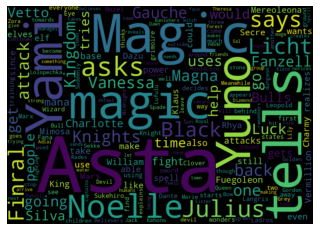

In [50]:
graph_wordcloud(generate_wordcloud_color(stoplist, words_as_series_not_lowered.value_counts()))

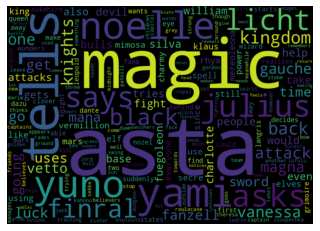

In [51]:
graph_wordcloud(generate_wordcloud_color(stoplist, words_as_series_lowered.value_counts()))

In [52]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pauli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/pauli/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [53]:
tagged_nltk_tokens = nltk.pos_tag(nltk_tokens)
tagged_nltk_tokens

[('In', 'IN'),
 ('Hage', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('takes', 'VBZ'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'NNS'),
 ('their', 'PRP$'),
 ('names', 'NNS'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('Asta', 'NNP'),
 ('.', '.'),
 ('Fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 (',', ','),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('Sister', 'NNP'),
 ('Lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('Asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('Asta', 'NNP'),


In [54]:
tagged_nltk_tokens_lowered = list(map(lambda x : (x[0].lower(), x[1]), tagged_nltk_tokens))
tagged_nltk_tokens_lowered

[('in', 'IN'),
 ('hage', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('takes', 'VBZ'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'NNS'),
 ('their', 'PRP$'),
 ('names', 'NNS'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('yuno', 'NNP'),
 ('and', 'CC'),
 ('asta', 'NNP'),
 ('.', '.'),
 ('fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 (',', ','),
 ('asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('sister', 'NNP'),
 ('lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('asta', 'NNP'),


In [55]:
def filter_by_tags(tagged_text, tags):
    return set(map(lambda x : x[0], filter(lambda x : x[1] in tags, tagged_text)))

In [56]:
def remove_tags(tagged_text, tags):
    return set(map(lambda x : x[0], filter(lambda x : x[1] not in tags, tagged_text)))

In [57]:
def filter_by_values(tagged_text, values):
    return set(map(lambda x : x[0], filter(lambda x : x[0] in values, tagged_text)))

In [58]:
def remove_by_values(tagged_text, values):
    return set(map(lambda x : x[0], filter(lambda x : x[0] not in values, tagged_text)))

In [59]:
def remove_by_list(to_filter, by):
    return set(filter(lambda x : x not in by, to_filter))

In [60]:
people = filter_by_tags(tagged_nltk_tokens, ['NNP'])
people

{'-50',
 'A',
 'Abari',
 'Above',
 'Abra',
 'Acceptance',
 'Acier',
 'Adlai',
 'Ado',
 'Afterward',
 'Agrippa',
 'Aguirre',
 'Air',
 'Alecdora',
 'Alfred',
 'Alive',
 'Anastasis',
 'Angel',
 'Angered',
 'Angry',
 'Anna',
 'Anti',
 'Anti-birds',
 'Aphro',
 'Aqua',
 'Aquaria',
 'Arcan',
 'Arcane',
 'Archangel',
 'Ark',
 'Armament',
 'Armor',
 'Armored',
 'Arrow',
 'Arrows',
 'Ash',
 'Asta',
 'Astas',
 'Atlas',
 'Attribute',
 'Attributes',
 'Augustus',
 'Avidya',
 'Avior',
 'Awards',
 'Back',
 'Balmain',
 'Banisher',
 'Banishers',
 'Barbary',
 'Baro',
 'Baron',
 'Barrage',
 'Barrier',
 'Base',
 'Basilisk',
 'Battle',
 'Beasts',
 'Beautiful',
 'Becquerel',
 'Beer',
 'Believer',
 'Believers',
 'Bell',
 'Ben',
 'Benfunk',
 'Big',
 'Binding',
 'Black',
 'Blade',
 'Blades',
 'Blast',
 'Blazing',
 'Blizzard',
 'Blockade',
 'Blood',
 'Bloodflow',
 'Blossom',
 'Blue',
 'Blunt',
 'Bog',
 'Boismortier',
 'Bone',
 'Booth',
 'Bouquet',
 'Bow',
 'Brachium',
 'Breath',
 'Breed',
 'Briar',
 'Bright',
 '

In [61]:
# NERTagger

In [62]:
pronouns = remove_by_list(filter_by_tags(tagged_nltk_tokens, ['PRP', 'PRP$']), ['Yami', 'Yuno'])
pronouns

{'He',
 'Her',
 'His',
 'It',
 'She',
 'Their',
 'They',
 'he',
 'her',
 'herself',
 'him',
 'himself',
 'his',
 'it',
 'its',
 'itself',
 'me',
 'she',
 'their',
 'them',
 'themselves',
 'they',
 'you',
 'your'}

In [63]:
characters = filter_by_tags(tagged_nltk_tokens, ['NNP'])
characters

{'-50',
 'A',
 'Abari',
 'Above',
 'Abra',
 'Acceptance',
 'Acier',
 'Adlai',
 'Ado',
 'Afterward',
 'Agrippa',
 'Aguirre',
 'Air',
 'Alecdora',
 'Alfred',
 'Alive',
 'Anastasis',
 'Angel',
 'Angered',
 'Angry',
 'Anna',
 'Anti',
 'Anti-birds',
 'Aphro',
 'Aqua',
 'Aquaria',
 'Arcan',
 'Arcane',
 'Archangel',
 'Ark',
 'Armament',
 'Armor',
 'Armored',
 'Arrow',
 'Arrows',
 'Ash',
 'Asta',
 'Astas',
 'Atlas',
 'Attribute',
 'Attributes',
 'Augustus',
 'Avidya',
 'Avior',
 'Awards',
 'Back',
 'Balmain',
 'Banisher',
 'Banishers',
 'Barbary',
 'Baro',
 'Baron',
 'Barrage',
 'Barrier',
 'Base',
 'Basilisk',
 'Battle',
 'Beasts',
 'Beautiful',
 'Becquerel',
 'Beer',
 'Believer',
 'Believers',
 'Bell',
 'Ben',
 'Benfunk',
 'Big',
 'Binding',
 'Black',
 'Blade',
 'Blades',
 'Blast',
 'Blazing',
 'Blizzard',
 'Blockade',
 'Blood',
 'Bloodflow',
 'Blossom',
 'Blue',
 'Blunt',
 'Bog',
 'Boismortier',
 'Bone',
 'Booth',
 'Bouquet',
 'Bow',
 'Brachium',
 'Breath',
 'Breed',
 'Briar',
 'Bright',
 '

In [64]:
characters_tagged_series = pd.Series(list(characters))
characters_tagged_series.value_counts()

Booth        1
David        1
Broccos      1
Demon        1
Ruben        1
            ..
Candelo      1
Kravitz      1
Poisonous    1
Klaus        1
Dive         1
Length: 849, dtype: int64

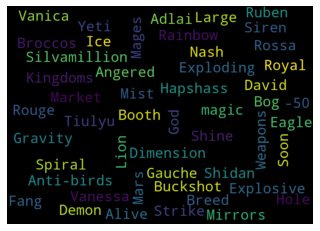

In [65]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, characters_tagged_series.value_counts()))

In [66]:
characters_lowered = list(map(lambda x : x.lower(), characters))
characters_lowered

['booth',
 'despair',
 'vice-captain',
 'kill',
 'ondell',
 'zero',
 'marco',
 'stages',
 'william',
 'hardness',
 'spatial',
 'phoenix',
 'kahono',
 'culvert',
 'dance',
 'diamond',
 'mereoleona',
 'slash',
 'needles',
 'life',
 'marx',
 'whip',
 'noelles',
 'fiend',
 'king',
 'priest',
 'avidya',
 'coelacanth',
 'javelin',
 'burns',
 'million',
 'gadjah',
 'lily',
 'prison',
 'purgatory',
 'intermediate',
 'deer',
 'ben',
 'gepard',
 'upstairs',
 'valtoria',
 'makusa',
 'godroc',
 'jackals',
 'lab',
 'regal',
 'demon-dweller',
 'witch',
 'department',
 'zenon',
 'blockade',
 'mirror',
 'base',
 'vide',
 'hage',
 'warren',
 'undergo',
 'warrior',
 'rhya',
 'unsworth',
 'francois',
 'warding',
 'mud',
 'reflect',
 'noelle',
 'prickly',
 'a',
 'zell',
 'aquaria',
 'armor',
 'outside',
 'luca',
 'black',
 'rapual',
 'bell',
 'underwater',
 'ideale',
 'hecairo',
 'back',
 'damanito',
 'thrust',
 'atlas',
 'gifso',
 'crumbling',
 'illusory',
 'lapis',
 'four',
 'tetia',
 'spectral',
 'mesh

In [67]:
no_characters_lowered = remove_by_values(tagged_nltk_tokens_lowered, characters_lowered)

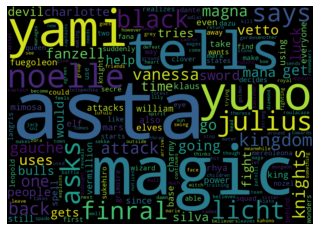

In [68]:
graph_wordcloud(generate_wordcloud_color(no_characters_lowered, words_as_series_lowered.value_counts()))

In [69]:
set(map(lambda x: x[1], filter(lambda x : x[0] == "asta", tagged_nltk_tokens_lowered)))

{'CC', 'JJ', 'NN', 'NNP', 'RB', 'VB', 'VBP'}

In [70]:
set(map(lambda x: x[1], filter(lambda x : x[0] == "Asta", tagged_nltk_tokens)))

{'CC', 'JJ', 'NN', 'NNP', 'RB', 'VB', 'VBP'}

In [71]:
set(map(lambda x: x[1], filter(lambda x : x[0] == "cannot", tagged_nltk_tokens)))

set()

In [72]:
tokenize_nltk("cannot")

['can', 'not']

In [73]:
characters = ["Acier", "Noelle", "Damnatio", "Nozel", "Solid", "Mereleona", "Fuegoleon", "Leopold", "Kirsch", "Mimosa"
                , "Gauche", "Marie", "Rill", "Finral", "Langris", "Gordon", "Lemiel", "Julius", "Yuno", "William", "Klaus", "Theresa"
                , "Charlotte", "Puli", "Sol", "Dorothy", "Jack", "Sekke", "Zora", "Asta", "Charmy", "Luck", "Magna", "Secre", "Grey"
                , "Vanessa", "Henry", "Lily", "Orsi", "Licht", "Fana", "Sally", "Vetto", "Mars", 'Yami', "Kahono", "Kiato", "Xerx", "Zara", "Fanzell"]

In [74]:
nltk_tokens_lowered_except_characters = list(map(lambda x : x if x in characters else x.lower(), nltk_tokens))
nltk_tokens_lowered_except_characters = list(map(lambda x : "Mereleona" if x == "mereoleona" else x, nltk_tokens_lowered_except_characters))
nltk_tokens_lowered_except_characters

['in',
 'hage',
 ',',
 'a',
 'priest',
 'finds',
 'two',
 'babies',
 'abandoned',
 'outside',
 'his',
 'church',
 '.',
 'he',
 'takes',
 'them',
 'inside',
 'and',
 'discovers',
 'their',
 'names',
 'to',
 'be',
 'Yuno',
 'and',
 'Asta',
 '.',
 'fifteen',
 'years',
 'later',
 ',',
 'Asta',
 'proposes',
 'to',
 'sister',
 'Lily',
 ',',
 'who',
 'refuses',
 'repeatedly',
 '.',
 'Yuno',
 'and',
 'the',
 'other',
 'orphans',
 'criticize',
 'Asta',
 'and',
 'point',
 'out',
 'his',
 'lack',
 'of',
 'magic',
 '.',
 'Asta',
 'tries',
 'to',
 'show',
 'off',
 'his',
 'skills',
 ',',
 'but',
 'Yuno',
 'outshines',
 'him',
 'with',
 'his',
 'magic',
 '.',
 'later',
 ',',
 'at',
 'the',
 'grimoire',
 'acceptance',
 'ceremony',
 ',',
 'a',
 'pair',
 'of',
 'nobles',
 'criticize',
 'the',
 'commoners',
 'there',
 '.',
 'despite',
 'Asta',
 'not',
 'receiving',
 'a',
 'grimoire',
 'while',
 'Yuno',
 'attains',
 'a',
 'four-leaf',
 'clover',
 'one',
 ',',
 'Asta',
 'challenges',
 'Yuno',
 'to',
 'the

In [75]:
tagged_nltk_tokens_lowered_except_characters = nltk.pos_tag(nltk_tokens_lowered_except_characters)
tagged_nltk_tokens_lowered_except_characters

[('in', 'IN'),
 ('hage', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('takes', 'VBZ'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'NNS'),
 ('their', 'PRP$'),
 ('names', 'NNS'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('Asta', 'NNP'),
 ('.', '.'),
 ('fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 (',', ','),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('Asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('Asta', 'NNP'),
 (

In [76]:
words_lowered_except_characters = [token for token in nltk_tokens_lowered_except_characters if token.isalpha() and token not in stoplist]
words_lowered_except_characters

['hage',
 'priest',
 'finds',
 'two',
 'babies',
 'abandoned',
 'outside',
 'church',
 'takes',
 'inside',
 'discovers',
 'names',
 'Yuno',
 'Asta',
 'fifteen',
 'years',
 'later',
 'Asta',
 'proposes',
 'sister',
 'Lily',
 'refuses',
 'repeatedly',
 'Yuno',
 'orphans',
 'criticize',
 'Asta',
 'point',
 'lack',
 'magic',
 'Asta',
 'tries',
 'show',
 'skills',
 'Yuno',
 'outshines',
 'magic',
 'later',
 'grimoire',
 'acceptance',
 'ceremony',
 'pair',
 'nobles',
 'criticize',
 'commoners',
 'despite',
 'Asta',
 'receiving',
 'grimoire',
 'Yuno',
 'attains',
 'clover',
 'one',
 'Asta',
 'challenges',
 'Yuno',
 'title',
 'wizard',
 'king',
 'Yuno',
 'ignores',
 'ceremony',
 'two',
 'nobles',
 'ambush',
 'Yuno',
 'outside',
 'tower',
 'Yuno',
 'overpowers',
 'three',
 'ambushed',
 'revchi',
 'salik',
 'former',
 'magic',
 'knight',
 'plans',
 'steal',
 'Yuno',
 'grimoire',
 'sell',
 'Asta',
 'comes',
 'Yuno',
 'rescue',
 'fails',
 'revchi',
 'breaks',
 'Asta',
 'spirit',
 'Yuno',
 'calls',

In [77]:
tagged_nltk_tokens_lec_filtered = list(filter(lambda x : x[0] in words_lowered_except_characters, tagged_nltk_tokens_lowered_except_characters))
tagged_nltk_tokens_lec_filtered

[('hage', 'NN'),
 ('priest', 'JJ'),
 ('finds', 'VBZ'),
 ('two', 'CD'),
 ('babies', 'NNS'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('church', 'NN'),
 ('takes', 'VBZ'),
 ('inside', 'RB'),
 ('discovers', 'NNS'),
 ('names', 'NNS'),
 ('Yuno', 'NNP'),
 ('Asta', 'NNP'),
 ('fifteen', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 ('refuses', 'VBZ'),
 ('repeatedly', 'RB'),
 ('Yuno', 'NNP'),
 ('orphans', 'NNS'),
 ('criticize', 'VBP'),
 ('Asta', 'NNP'),
 ('point', 'NN'),
 ('lack', 'NN'),
 ('magic', 'NN'),
 ('Asta', 'NNP'),
 ('tries', 'VBZ'),
 ('show', 'VB'),
 ('skills', 'NNS'),
 ('Yuno', 'NNP'),
 ('outshines', 'VBZ'),
 ('magic', 'NN'),
 ('later', 'RB'),
 ('grimoire', 'NN'),
 ('acceptance', 'NN'),
 ('ceremony', 'NN'),
 ('pair', 'NN'),
 ('nobles', 'NNS'),
 ('criticize', 'VBP'),
 ('commoners', 'NNS'),
 ('despite', 'IN'),
 ('Asta', 'NNP'),
 ('receiving', 'VBG'),
 ('grimoire', 'NN'),
 ('Yuno', 'NNP'),
 ('attains', 'VBZ'),


In [78]:
words_lec_as_series = pd.Series(words_lowered_except_characters)
words_lec_as_series.value_counts()

Asta         1362
magic         912
tells         477
Yami          469
Yuno          407
             ... 
suspected       1
instances       1
resents         1
trusted         1
disciple        1
Length: 5520, dtype: int64

In [79]:
characters_in_lec = filter_by_tags(tagged_nltk_tokens_lowered_except_characters, ['NNP'])
characters_in_lec

{'Acier',
 'Asta',
 'Charlotte',
 'Charmy',
 'Damnatio',
 'Dorothy',
 'Fana',
 'Fanzell',
 'Finral',
 'Fuegoleon',
 'Gauche',
 'Gordon',
 'Grey',
 'Henry',
 'Jack',
 'Julius',
 'Kahono',
 'Kiato',
 'Kirsch',
 'Klaus',
 'Langris',
 'Lemiel',
 'Leopold',
 'Licht',
 'Lily',
 'Luck',
 'Magna',
 'Marie',
 'Mars',
 'Mereleona',
 'Mimosa',
 'Noelle',
 'Nozel',
 'Orsi',
 'Puli',
 'Rill',
 'Sally',
 'Secre',
 'Sekke',
 'Sol',
 'Solid',
 'Theresa',
 'Vanessa',
 'Vetto',
 'William',
 'Xerx',
 'Yami',
 'Yuno',
 'Zara',
 'Zora',
 'boismortier',
 'kaiser',
 'kill',
 'kira',
 'kruger',
 'magic',
 'marron',
 'undergo',
 'xiii'}

In [80]:
characters_in_lec_series = pd.Series(list(characters_in_lec))
characters_in_lec_series.value_counts()

magic          1
Gordon         1
Puli           1
Fana           1
Mimosa         1
Henry          1
kira           1
Fanzell        1
Lily           1
Gauche         1
Fuegoleon      1
kaiser         1
Zora           1
Marie          1
Nozel          1
Orsi           1
Leopold        1
Rill           1
Kirsch         1
Sally          1
Mars           1
Kiato          1
Finral         1
kruger         1
kill           1
Mereleona      1
Julius         1
Zara           1
Xerx           1
boismortier    1
undergo        1
Kahono         1
Charlotte      1
Solid          1
Charmy         1
Secre          1
Magna          1
Jack           1
Acier          1
Yami           1
William        1
Grey           1
Langris        1
Licht          1
Noelle         1
Luck           1
Vetto          1
xiii           1
marron         1
Sol            1
Sekke          1
Theresa        1
Dorothy        1
Asta           1
Vanessa        1
Lemiel         1
Yuno           1
Klaus          1
Damnatio      

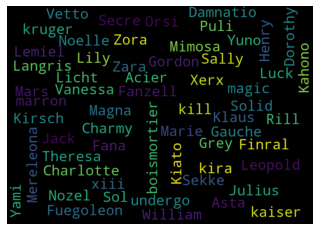

In [81]:
graph_wordcloud(generate_wordcloud_color_no_ranks(None, characters_in_lec_series.value_counts()))

In [82]:
characters_in_lec_by_freq = list(filter(lambda x : x in characters, words_lowered_except_characters))
characters_in_lec_by_freq

['Yuno',
 'Asta',
 'Asta',
 'Lily',
 'Yuno',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Yuno',
 'Yuno',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Lily',
 'Asta',
 'Lily',
 'Yuno',
 'Lily',
 'Asta',
 'Yuno',
 'Lily',
 'Lily',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Lily',
 'Asta',
 'Lily',
 'Asta',
 'Asta',
 'Lily',
 'Lily',
 'Asta',
 'Yuno',
 'Asta',
 'Lily',
 'Asta',
 'Lily',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Lily',
 'Asta',
 'Asta',
 'Orsi',
 'Asta',
 'Orsi',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Yuno',
 'Asta',
 'Yuno',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Asta',
 'Asta',
 'Yuno',
 'Asta',
 'Yuno',
 'Lily',
 'Orsi',
 'Asta',
 'Yuno',
 'Yuno',
 'Asta',
 'Asta',
 'Lily',
 'Orsi',
 'Lily',
 'Yuno',
 'Asta',
 'Yuno',
 'Asta',
 'Asta',
 'Yami',
 

In [83]:
characters_in_lec_by_freq_as_series = pd.Series(characters_in_lec_by_freq)
characters_in_lec_by_freq_as_series.value_counts()

Asta         1362
Yami          469
Yuno          407
Noelle        402
Julius        257
Licht         220
Finral        214
Vanessa       173
Magna         163
Gauche        155
Luck          138
Fanzell       137
Vetto         127
Charlotte     113
Fuegoleon     109
William       108
Klaus          98
Mimosa         97
Charmy         96
Mereleona      92
Mars           90
Secre          88
Langris        83
Leopold        83
Fana           79
Nozel          77
Grey           64
Kahono         63
Gordon         62
Zora           58
Marie          58
Sekke          51
Lily           51
Jack           49
Sol            47
Theresa        47
Kiato          40
Sally          37
Xerx           33
Kirsch         30
Orsi           28
Damnatio       27
Rill           27
Henry          17
Zara           17
Puli           11
Dorothy        10
Solid           9
Lemiel          9
Acier           6
dtype: int64

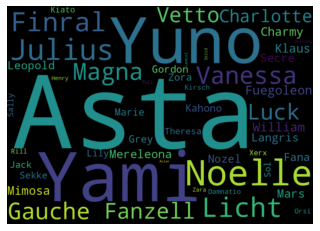

In [84]:
graph_wordcloud(generate_wordcloud_color(None, characters_in_lec_by_freq_as_series.value_counts()))

In [85]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

#### Adjetives in Corpus

In [86]:
adjectives_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['JJ', 'JJR', 'JJS']), tagged_nltk_tokens_lec_filtered))
adjectives_in_lec_tagged

[('priest', 'JJ'),
 ('former', 'JJ'),
 ('revchi', 'JJ'),
 ('large', 'JJ'),
 ('okay', 'JJ'),
 ('okay', 'JJ'),
 ('top', 'JJ'),
 ('possible', 'JJ'),
 ('brave', 'JJ'),
 ('frightened', 'JJ'),
 ('inspired', 'JJ'),
 ('giant', 'JJ'),
 ('important', 'JJ'),
 ('important', 'JJ'),
 ('wizard', 'JJ'),
 ('surprised', 'JJ'),
 ('different', 'JJ'),
 ('nash', 'JJ'),
 ('wizard', 'JJ'),
 ('nash', 'JJ'),
 ('rough', 'JJ'),
 ('able', 'JJ'),
 ('surprised', 'JJ'),
 ('weak', 'JJ'),
 ('present', 'JJ'),
 ('revchi', 'JJ'),
 ('unconscious', 'JJ'),
 ('wizard', 'JJ'),
 ('giant', 'JJ'),
 ('first', 'JJ'),
 ('following', 'JJ'),
 ('magic', 'JJ'),
 ('moguro', 'JJ'),
 ('magic', 'JJ'),
 ('sister', 'JJ'),
 ('nash', 'JJ'),
 ('next', 'JJ'),
 ('nash', 'JJ'),
 ('weak', 'JJ'),
 ('poor', 'JJ'),
 ('magic', 'JJ'),
 ('special', 'JJ'),
 ('various', 'JJ'),
 ('boys', 'JJ'),
 ('injured', 'JJ'),
 ('long', 'JJ'),
 ('royal', 'JJ'),
 ('boys', 'JJ'),
 ('magic', 'JJ'),
 ('less', 'JJR'),
 ('magic', 'JJ'),
 ('swarm', 'JJ'),
 ('black', 'JJ'),
 ('g

In [87]:
adjectives_in_lec = list(map(lambda x : x[0], adjectives_in_lec_tagged))
adjectives_in_lec = list(filter(lambda x : x not in characters, adjectives_in_lec))
adjectives_in_lec

['priest',
 'former',
 'revchi',
 'large',
 'okay',
 'okay',
 'top',
 'possible',
 'brave',
 'frightened',
 'inspired',
 'giant',
 'important',
 'important',
 'wizard',
 'surprised',
 'different',
 'nash',
 'wizard',
 'nash',
 'rough',
 'able',
 'surprised',
 'weak',
 'present',
 'revchi',
 'unconscious',
 'wizard',
 'giant',
 'first',
 'following',
 'magic',
 'moguro',
 'magic',
 'sister',
 'nash',
 'next',
 'nash',
 'weak',
 'poor',
 'magic',
 'special',
 'various',
 'boys',
 'injured',
 'long',
 'royal',
 'boys',
 'magic',
 'less',
 'magic',
 'swarm',
 'black',
 'green',
 'gueldre',
 'coral',
 'golden',
 'various',
 'great',
 'final',
 'weak',
 'single',
 'wizard',
 'wizard',
 'crowd',
 'delusional',
 'salim',
 'salim',
 'powerful',
 'able',
 'exam',
 'golden',
 'magical',
 'many',
 'black',
 'poisonous',
 'black',
 'golden',
 'black',
 'busy',
 'sukehiro',
 'ritual',
 'final',
 'black',
 'impressed',
 'new',
 'new',
 'excited',
 'next',
 'black',
 'new',
 'royal',
 'insect',
 'equa

In [88]:
adjectives_in_lec_as_series = pd.Series(adjectives_in_lec)
adjectives_in_lec_as_series.value_counts()

magic           349
black           210
able             84
golden           58
new              53
               ... 
reincarnated      1
kindest           1
forgive           1
uncertain         1
minimal           1
Length: 908, dtype: int64

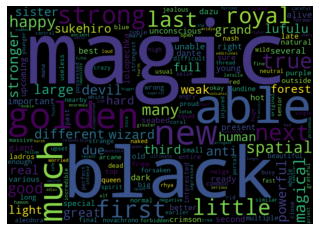

In [89]:
graph_wordcloud(generate_wordcloud_color(None, adjectives_in_lec_as_series.value_counts()))

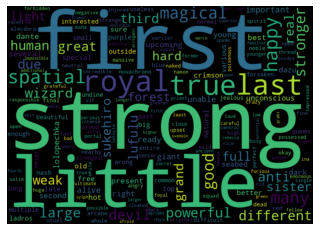

In [90]:
adjectives_in_lec = list(filter(lambda x : x not in ['golden', 'black', 'magic', 'able', 'new', 'much', 'next'], adjectives_in_lec))
adjectives_in_lec_as_series = pd.Series(adjectives_in_lec)
graph_wordcloud(generate_wordcloud_color(None, adjectives_in_lec_as_series.value_counts()))

### Lemmatizing

#### Verbs in Corpus

##### Non-Lemmatized

In [91]:
verbs_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']), tagged_nltk_tokens_lec_filtered))
verbs_in_lec_tagged

[('finds', 'VBZ'),
 ('abandoned', 'VBD'),
 ('takes', 'VBZ'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('refuses', 'VBZ'),
 ('criticize', 'VBP'),
 ('tries', 'VBZ'),
 ('show', 'VB'),
 ('outshines', 'VBZ'),
 ('criticize', 'VBP'),
 ('receiving', 'VBG'),
 ('attains', 'VBZ'),
 ('challenges', 'VBZ'),
 ('ignores', 'VBZ'),
 ('overpowers', 'VBZ'),
 ('ambushed', 'VBN'),
 ('plans', 'VBZ'),
 ('steal', 'VB'),
 ('sell', 'VB'),
 ('comes', 'VBZ'),
 ('fails', 'VBZ'),
 ('calls', 'VBZ'),
 ('motivated', 'VBN'),
 ('decides', 'VBZ'),
 ('keep', 'VB'),
 ('summons', 'VBZ'),
 ('revchi', 'VB'),
 ('appears', 'VBZ'),
 ('grabs', 'VBD'),
 ('appears', 'VBZ'),
 ('running', 'VBG'),
 ('fell', 'VBD'),
 ('asked', 'VBD'),
 ('came', 'VBD'),
 ('grab', 'VB'),
 ('get', 'VB'),
 ('called', 'VBD'),
 ('told', 'VBD'),
 ('got', 'VBD'),
 ('kept', 'VBD'),
 ('running', 'VBG'),
 ('holding', 'VBG'),
 ('commented', 'VBD'),
 ('waiting', 'VBG'),
 ('started', 'VBD'),
 ('making', 'VBG'),
 ('wanted', 'VBD'),
 ('marry', 'VB'),
 ('explained', 'V

In [92]:
verbs_in_lec = list(map(lambda x : x[0], verbs_in_lec_tagged))
verbs_in_lec = list(filter(lambda x : x not in characters, verbs_in_lec))
verbs_in_lec

['finds',
 'abandoned',
 'takes',
 'proposes',
 'sister',
 'refuses',
 'criticize',
 'tries',
 'show',
 'outshines',
 'criticize',
 'receiving',
 'attains',
 'challenges',
 'ignores',
 'overpowers',
 'ambushed',
 'plans',
 'steal',
 'sell',
 'comes',
 'fails',
 'calls',
 'motivated',
 'decides',
 'keep',
 'summons',
 'revchi',
 'appears',
 'grabs',
 'appears',
 'running',
 'fell',
 'asked',
 'came',
 'grab',
 'get',
 'called',
 'told',
 'got',
 'kept',
 'running',
 'holding',
 'commented',
 'waiting',
 'started',
 'making',
 'wanted',
 'marry',
 'explained',
 'told',
 'finished',
 'marry',
 'smiled',
 'read',
 'came',
 'exist',
 'brought',
 'threatened',
 'destroy',
 'defeated',
 'returning',
 'appeared',
 'ended',
 'seemed',
 'admiring',
 'asked',
 'agreed',
 'added',
 'stood',
 'told',
 'made',
 'become',
 'seemed',
 'proceeded',
 'list',
 'wanted',
 'asked',
 'marry',
 'going',
 'responded',
 'kept',
 'asking',
 'kept',
 'saying',
 'released',
 'practicing',
 'seemed',
 'frustrated'

In [93]:
verbs_in_lec_as_series = pd.Series(verbs_in_lec)
verbs_in_lec_as_series.value_counts()

tells         426
asks          245
says          225
get           145
go            144
             ... 
fends           1
twitch          1
packs           1
infuriated      1
perches         1
Length: 2540, dtype: int64

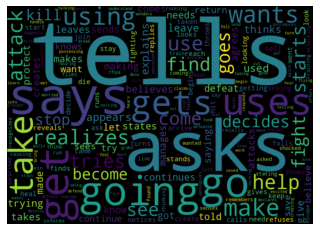

In [94]:
graph_wordcloud(generate_wordcloud_color(None, verbs_in_lec_as_series.value_counts()))

##### Lemmatized

In [95]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/pauli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/pauli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [96]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmas_lec = []
lemmas_lec_filtered = []
for token in nltk_tokens_lowered_except_characters: 
  if token in characters:
    lemmas_lec.append(token)
    lemmas_lec_filtered.append(token)
  else:
    if token.isalpha() and token not in stoplist:
      lemmas_lec_filtered.append(lemmatizer.lemmatize(token))
    lemmas_lec.append(lemmatizer.lemmatize(token))
lemmas_lec

['in',
 'hage',
 ',',
 'a',
 'priest',
 'find',
 'two',
 'baby',
 'abandoned',
 'outside',
 'his',
 'church',
 '.',
 'he',
 'take',
 'them',
 'inside',
 'and',
 'discovers',
 'their',
 'name',
 'to',
 'be',
 'Yuno',
 'and',
 'Asta',
 '.',
 'fifteen',
 'year',
 'later',
 ',',
 'Asta',
 'proposes',
 'to',
 'sister',
 'Lily',
 ',',
 'who',
 'refuse',
 'repeatedly',
 '.',
 'Yuno',
 'and',
 'the',
 'other',
 'orphan',
 'criticize',
 'Asta',
 'and',
 'point',
 'out',
 'his',
 'lack',
 'of',
 'magic',
 '.',
 'Asta',
 'try',
 'to',
 'show',
 'off',
 'his',
 'skill',
 ',',
 'but',
 'Yuno',
 'outshines',
 'him',
 'with',
 'his',
 'magic',
 '.',
 'later',
 ',',
 'at',
 'the',
 'grimoire',
 'acceptance',
 'ceremony',
 ',',
 'a',
 'pair',
 'of',
 'noble',
 'criticize',
 'the',
 'commoner',
 'there',
 '.',
 'despite',
 'Asta',
 'not',
 'receiving',
 'a',
 'grimoire',
 'while',
 'Yuno',
 'attains',
 'a',
 'four-leaf',
 'clover',
 'one',
 ',',
 'Asta',
 'challenge',
 'Yuno',
 'to',
 'the',
 'title',
 

In [97]:
lemmas_lec_filtered

['hage',
 'priest',
 'find',
 'two',
 'baby',
 'abandoned',
 'outside',
 'church',
 'take',
 'inside',
 'discovers',
 'name',
 'Yuno',
 'Asta',
 'fifteen',
 'year',
 'later',
 'Asta',
 'proposes',
 'sister',
 'Lily',
 'refuse',
 'repeatedly',
 'Yuno',
 'orphan',
 'criticize',
 'Asta',
 'point',
 'lack',
 'magic',
 'Asta',
 'try',
 'show',
 'skill',
 'Yuno',
 'outshines',
 'magic',
 'later',
 'grimoire',
 'acceptance',
 'ceremony',
 'pair',
 'noble',
 'criticize',
 'commoner',
 'despite',
 'Asta',
 'receiving',
 'grimoire',
 'Yuno',
 'attains',
 'clover',
 'one',
 'Asta',
 'challenge',
 'Yuno',
 'title',
 'wizard',
 'king',
 'Yuno',
 'ignores',
 'ceremony',
 'two',
 'noble',
 'ambush',
 'Yuno',
 'outside',
 'tower',
 'Yuno',
 'overpowers',
 'three',
 'ambushed',
 'revchi',
 'salik',
 'former',
 'magic',
 'knight',
 'plan',
 'steal',
 'Yuno',
 'grimoire',
 'sell',
 'Asta',
 'come',
 'Yuno',
 'rescue',
 'fails',
 'revchi',
 'break',
 'Asta',
 'spirit',
 'Yuno',
 'call',
 'Asta',
 'rival',

In [98]:
tagged_lemmas_lec = nltk.pos_tag(lemmas_lec)
tagged_lemmas_lec

[('in', 'IN'),
 ('hage', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('priest', 'JJ'),
 ('find', 'NN'),
 ('two', 'CD'),
 ('baby', 'NN'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('his', 'PRP$'),
 ('church', 'NN'),
 ('.', '.'),
 ('he', 'PRP'),
 ('take', 'VB'),
 ('them', 'PRP'),
 ('inside', 'RB'),
 ('and', 'CC'),
 ('discovers', 'VBZ'),
 ('their', 'PRP$'),
 ('name', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('Asta', 'NNP'),
 ('.', '.'),
 ('fifteen', 'JJ'),
 ('year', 'NN'),
 ('later', 'RB'),
 (',', ','),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('to', 'TO'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('refuse', 'VBP'),
 ('repeatedly', 'RB'),
 ('.', '.'),
 ('Yuno', 'NNP'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('orphan', 'JJ'),
 ('criticize', 'VB'),
 ('Asta', 'NNP'),
 ('and', 'CC'),
 ('point', 'NN'),
 ('out', 'RP'),
 ('his', 'PRP$'),
 ('lack', 'NN'),
 ('of', 'IN'),
 ('magic', 'NN'),
 ('.', '.'),
 ('Asta', 'NNP'),
 ('try', 'NN'),
 

In [99]:
tagged_lemmas_lec_filtered = list(filter(lambda x : x[0] in lemmas_lec_filtered, tagged_lemmas_lec))
tagged_lemmas_lec_filtered

[('hage', 'NN'),
 ('priest', 'JJ'),
 ('find', 'NN'),
 ('two', 'CD'),
 ('baby', 'NN'),
 ('abandoned', 'VBD'),
 ('outside', 'IN'),
 ('church', 'NN'),
 ('take', 'VB'),
 ('inside', 'RB'),
 ('discovers', 'VBZ'),
 ('name', 'NN'),
 ('Yuno', 'NNP'),
 ('Asta', 'NNP'),
 ('fifteen', 'JJ'),
 ('year', 'NN'),
 ('later', 'RB'),
 ('Asta', 'NNP'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('Lily', 'NNP'),
 ('refuse', 'VBP'),
 ('repeatedly', 'RB'),
 ('Yuno', 'NNP'),
 ('orphan', 'JJ'),
 ('criticize', 'VB'),
 ('Asta', 'NNP'),
 ('point', 'NN'),
 ('lack', 'NN'),
 ('magic', 'NN'),
 ('Asta', 'NNP'),
 ('try', 'NN'),
 ('show', 'VB'),
 ('skill', 'NN'),
 ('Yuno', 'NNP'),
 ('outshines', 'VBZ'),
 ('magic', 'NN'),
 ('later', 'RB'),
 ('grimoire', 'NN'),
 ('acceptance', 'NN'),
 ('ceremony', 'NN'),
 ('pair', 'NN'),
 ('noble', 'JJ'),
 ('criticize', 'VB'),
 ('commoner', 'NN'),
 ('despite', 'IN'),
 ('Asta', 'NNP'),
 ('receiving', 'VBG'),
 ('grimoire', 'NN'),
 ('Yuno', 'NNP'),
 ('attains', 'VBZ'),
 ('clover', 'NN'),
 ('one

In [100]:
lemmas_lec_filtered_as_series = pd.Series(lemmas_lec_filtered)
lemmas_lec_filtered_as_series.value_counts()

Asta            1362
magic            912
tell             510
Yami             469
Yuno             407
                ... 
acceleration       1
alert              1
rumbling           1
ironic             1
bolt               1
Length: 4851, dtype: int64

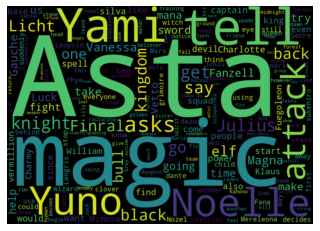

In [101]:
graph_wordcloud(generate_wordcloud_color(None, lemmas_lec_filtered_as_series.value_counts()))

In [102]:
verbs_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']), tagged_lemmas_lec_filtered))
verbs_in_lec_tagged

[('abandoned', 'VBD'),
 ('take', 'VB'),
 ('discovers', 'VBZ'),
 ('proposes', 'VBZ'),
 ('sister', 'VB'),
 ('refuse', 'VBP'),
 ('criticize', 'VB'),
 ('show', 'VB'),
 ('outshines', 'VBZ'),
 ('criticize', 'VB'),
 ('receiving', 'VBG'),
 ('attains', 'VBZ'),
 ('ignores', 'VBZ'),
 ('overpowers', 'VBZ'),
 ('ambushed', 'VBN'),
 ('plan', 'VBP'),
 ('steal', 'VB'),
 ('sell', 'VB'),
 ('come', 'VBP'),
 ('fails', 'VBZ'),
 ('motivated', 'VBN'),
 ('decides', 'VBZ'),
 ('keep', 'VB'),
 ('summons', 'VBZ'),
 ('revchi', 'VB'),
 ('appears', 'VBZ'),
 ('grab', 'VBP'),
 ('appears', 'VBZ'),
 ('running', 'VBG'),
 ('fell', 'VBD'),
 ('asked', 'VBD'),
 ('came', 'VBD'),
 ('grab', 'VB'),
 ('get', 'VB'),
 ('called', 'VBD'),
 ('told', 'VBD'),
 ('got', 'VBD'),
 ('kept', 'VBD'),
 ('running', 'VBG'),
 ('holding', 'VBG'),
 ('commented', 'VBD'),
 ('waiting', 'VBG'),
 ('started', 'VBD'),
 ('making', 'VBG'),
 ('wanted', 'VBD'),
 ('marry', 'VB'),
 ('explained', 'VBD'),
 ('told', 'VBD'),
 ('finished', 'VBN'),
 ('marry', 'VB'),
 (

In [103]:
verbs_in_lec = list(map(lambda x : x[0], verbs_in_lec_tagged))
verbs_in_lec = list(filter(lambda x : x not in characters, verbs_in_lec))
verbs_in_lec

['abandoned',
 'take',
 'discovers',
 'proposes',
 'sister',
 'refuse',
 'criticize',
 'show',
 'outshines',
 'criticize',
 'receiving',
 'attains',
 'ignores',
 'overpowers',
 'ambushed',
 'plan',
 'steal',
 'sell',
 'come',
 'fails',
 'motivated',
 'decides',
 'keep',
 'summons',
 'revchi',
 'appears',
 'grab',
 'appears',
 'running',
 'fell',
 'asked',
 'came',
 'grab',
 'get',
 'called',
 'told',
 'got',
 'kept',
 'running',
 'holding',
 'commented',
 'waiting',
 'started',
 'making',
 'wanted',
 'marry',
 'explained',
 'told',
 'finished',
 'marry',
 'smiled',
 'read',
 'came',
 'exist',
 'brought',
 'threatened',
 'destroy',
 'defeated',
 'returning',
 'appeared',
 'ended',
 'seemed',
 'admiring',
 'asked',
 'king',
 'agreed',
 'added',
 'stood',
 'told',
 'made',
 'become',
 'seemed',
 'proceeded',
 'list',
 'wanted',
 'asked',
 'marry',
 'going',
 'responded',
 'kept',
 'asking',
 'kept',
 'saying',
 'released',
 'practicing',
 'seemed',
 'frustrated',
 'use',
 'passed',
 'carr

In [104]:
verbs_in_lec_as_series = pd.Series(verbs_in_lec)
dict(verbs_in_lec_as_series.value_counts())

{'tell': 462,
 'asks': 247,
 'say': 246,
 'get': 225,
 'go': 207,
 'take': 148,
 'going': 137,
 'make': 125,
 'want': 118,
 'see': 103,
 'attack': 103,
 'come': 97,
 'find': 93,
 'using': 91,
 'realizes': 83,
 'help': 83,
 'think': 80,
 'use': 80,
 'know': 75,
 'stop': 74,
 'fight': 66,
 'kill': 65,
 'start': 64,
 'decides': 64,
 'become': 63,
 'try': 61,
 'give': 60,
 'appears': 57,
 'wonder': 56,
 'explains': 56,
 'used': 52,
 'leave': 52,
 'hit': 51,
 'defeat': 51,
 'look': 47,
 'run': 46,
 'trying': 45,
 'save': 45,
 'let': 45,
 'making': 42,
 'cut': 42,
 'continues': 42,
 'keep': 41,
 'turn': 41,
 'manages': 40,
 'agrees': 40,
 'feel': 39,
 'need': 39,
 'sends': 39,
 'told': 39,
 'got': 38,
 'saying': 38,
 'show': 38,
 'made': 38,
 'creates': 38,
 'continue': 36,
 'protect': 36,
 'fly': 36,
 'getting': 34,
 'believe': 34,
 'return': 34,
 'fighting': 33,
 'reach': 32,
 'throw': 31,
 'seeing': 31,
 'grab': 31,
 'swing': 30,
 'stand': 30,
 'put': 30,
 'knight': 29,
 'break': 29,
 'be

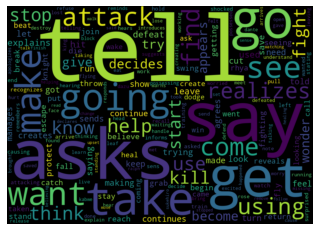

In [105]:
graph_wordcloud(generate_wordcloud_color(None, verbs_in_lec_as_series.value_counts()))

In [106]:
bad_verbs = ['say', 'asks', 'ask', 'tell', 'get', 'go', 'going', 'come', 'take', 'make', 'see']

In [107]:
verbs_in_lec = list(map(lambda x : x[0], verbs_in_lec_tagged))
verbs_in_lec = list(filter(lambda x : x not in bad_verbs, verbs_in_lec))
verbs_in_lec

['abandoned',
 'discovers',
 'proposes',
 'sister',
 'refuse',
 'criticize',
 'show',
 'outshines',
 'criticize',
 'receiving',
 'attains',
 'ignores',
 'overpowers',
 'ambushed',
 'plan',
 'steal',
 'sell',
 'fails',
 'motivated',
 'decides',
 'keep',
 'summons',
 'revchi',
 'appears',
 'grab',
 'appears',
 'running',
 'fell',
 'asked',
 'came',
 'grab',
 'called',
 'told',
 'got',
 'kept',
 'running',
 'holding',
 'commented',
 'waiting',
 'started',
 'making',
 'wanted',
 'marry',
 'explained',
 'told',
 'finished',
 'marry',
 'smiled',
 'read',
 'came',
 'exist',
 'brought',
 'threatened',
 'destroy',
 'defeated',
 'returning',
 'appeared',
 'ended',
 'seemed',
 'admiring',
 'asked',
 'king',
 'agreed',
 'added',
 'stood',
 'told',
 'made',
 'become',
 'seemed',
 'proceeded',
 'list',
 'wanted',
 'asked',
 'marry',
 'responded',
 'kept',
 'asking',
 'kept',
 'saying',
 'Yuno',
 'released',
 'practicing',
 'seemed',
 'frustrated',
 'use',
 'passed',
 'carrying',
 'told',
 'help',
 '

In [108]:
verbs_in_lec_as_series = pd.Series(verbs_in_lec)
dict(verbs_in_lec_as_series.value_counts())

{'want': 118,
 'attack': 103,
 'find': 93,
 'using': 91,
 'help': 83,
 'realizes': 83,
 'use': 80,
 'think': 80,
 'know': 75,
 'stop': 74,
 'fight': 66,
 'kill': 65,
 'decides': 64,
 'start': 64,
 'become': 63,
 'try': 61,
 'give': 60,
 'appears': 57,
 'explains': 56,
 'wonder': 56,
 'used': 52,
 'leave': 52,
 'defeat': 51,
 'hit': 51,
 'look': 47,
 'run': 46,
 'trying': 45,
 'let': 45,
 'save': 45,
 'cut': 42,
 'continues': 42,
 'making': 42,
 'turn': 41,
 'keep': 41,
 'manages': 40,
 'agrees': 40,
 'sends': 39,
 'told': 39,
 'need': 39,
 'feel': 39,
 'creates': 38,
 'show': 38,
 'made': 38,
 'got': 38,
 'saying': 38,
 'fly': 36,
 'protect': 36,
 'continue': 36,
 'believe': 34,
 'return': 34,
 'getting': 34,
 'fighting': 33,
 'reach': 32,
 'seeing': 31,
 'grab': 31,
 'throw': 31,
 'swing': 30,
 'put': 30,
 'stand': 30,
 'knight': 29,
 'break': 29,
 'begin': 28,
 'die': 27,
 'escape': 27,
 'join': 27,
 'beat': 26,
 'catch': 26,
 'went': 25,
 'rhya': 25,
 'fall': 25,
 'stay': 25,
 'reve

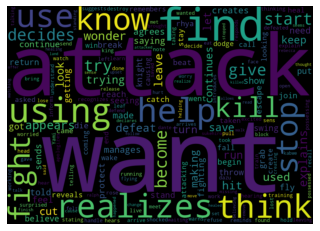

In [109]:
graph_wordcloud(generate_wordcloud_color(None, verbs_in_lec_as_series.value_counts()))

In [110]:
adjectives_in_lec_tagged = list(filter(lambda x : any(x[1] == i for i in ['JJ', 'JJR', 'JJS']), tagged_lemmas_lec_filtered))
adjectives_in_lec_tagged

[('priest', 'JJ'),
 ('fifteen', 'JJ'),
 ('orphan', 'JJ'),
 ('noble', 'JJ'),
 ('noble', 'JJ'),
 ('former', 'JJ'),
 ('revchi', 'JJ'),
 ('large', 'JJ'),
 ('okay', 'JJ'),
 ('okay', 'JJ'),
 ('top', 'JJ'),
 ('possible', 'JJ'),
 ('brave', 'JJ'),
 ('frightened', 'JJ'),
 ('inspired', 'JJ'),
 ('giant', 'JJ'),
 ('important', 'JJ'),
 ('important', 'JJ'),
 ('wizard', 'JJ'),
 ('surprised', 'JJ'),
 ('different', 'JJ'),
 ('nash', 'JJ'),
 ('wizard', 'JJ'),
 ('nash', 'JJ'),
 ('rough', 'JJ'),
 ('able', 'JJ'),
 ('surprised', 'JJ'),
 ('weak', 'JJ'),
 ('present', 'JJ'),
 ('revchi', 'JJ'),
 ('unconscious', 'JJ'),
 ('wizard', 'JJ'),
 ('giant', 'JJ'),
 ('first', 'JJ'),
 ('following', 'JJ'),
 ('magic', 'JJ'),
 ('moguro', 'JJ'),
 ('magic', 'JJ'),
 ('sister', 'JJ'),
 ('foster', 'JJ'),
 ('nash', 'JJ'),
 ('next', 'JJ'),
 ('nash', 'JJ'),
 ('weak', 'JJ'),
 ('poor', 'JJ'),
 ('magic', 'JJ'),
 ('special', 'JJ'),
 ('various', 'JJ'),
 ('tato', 'JJ'),
 ('boy', 'JJ'),
 ('injured', 'JJ'),
 ('long', 'JJ'),
 ('royal', 'JJ'),
 

In [111]:
bad_adjectives = ['golden', 'black', 'magic', 'able', 'new', 'much', 'next']

In [112]:
adjectives_in_lec = list(map(lambda x : x[0], adjectives_in_lec_tagged))
adjectives_in_lec = list(filter(lambda x : x not in characters, adjectives_in_lec))
adjectives_in_lec = list(filter(lambda x : x not in bad_adjectives, adjectives_in_lec))
adjectives_in_lec

['priest',
 'fifteen',
 'orphan',
 'noble',
 'noble',
 'former',
 'revchi',
 'large',
 'okay',
 'okay',
 'top',
 'possible',
 'brave',
 'frightened',
 'inspired',
 'giant',
 'important',
 'important',
 'wizard',
 'surprised',
 'different',
 'nash',
 'wizard',
 'nash',
 'rough',
 'surprised',
 'weak',
 'present',
 'revchi',
 'unconscious',
 'wizard',
 'giant',
 'first',
 'following',
 'moguro',
 'sister',
 'foster',
 'nash',
 'nash',
 'weak',
 'poor',
 'special',
 'various',
 'tato',
 'boy',
 'injured',
 'long',
 'royal',
 'boy',
 'le',
 'swarm',
 'green',
 'gueldre',
 'coral',
 'various',
 'great',
 'final',
 'weak',
 'single',
 'wizard',
 'wizard',
 'delusional',
 'contestant',
 'salim',
 'powerful',
 'exam',
 'magical',
 'many',
 'poisonous',
 'welcome',
 'busy',
 'ritual',
 'final',
 'impressed',
 'excited',
 'royal',
 'insect',
 'equal',
 'wrong',
 'upset',
 'afraid',
 'giant',
 'free',
 'strong',
 'magical',
 'squad',
 'clean',
 'fair',
 'handle',
 'ideal',
 'personal',
 'seihi',


In [113]:
adjectives_in_lec_as_series = pd.Series(adjectives_in_lec)
adjectives_in_lec_as_series.value_counts()

strong         46
first          43
human          42
little         37
spatial        34
               ..
appropriate     1
ambush          1
unguarded       1
f               1
minimal         1
Length: 991, dtype: int64

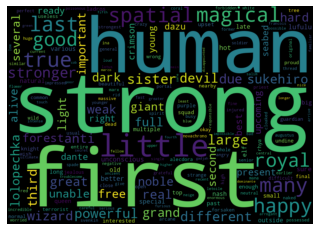

In [114]:
graph_wordcloud(generate_wordcloud_color(None, adjectives_in_lec_as_series.value_counts()))

In [115]:
def write_json(to_json, filename):
    json_object = json.dumps(to_json)

    with open(filename, "w") as outfile:
        outfile.write(json_object)

In [116]:
write_json(characters,          "2_characters_black_clover.json")
write_json(bad_verbs,           "2_bad_verbs_black_clover.json")
write_json(bad_adjectives,      "2_bad_adjectives_black_clover.json")
write_json(lemmas_lec_filtered, "2_lemmatized_filtered_black_clover.json")
write_json(adjectives_in_lec,   "2_adjectives_black_clover.json")
write_json(verbs_in_lec,        "2_verbs_black_clover.json")